 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


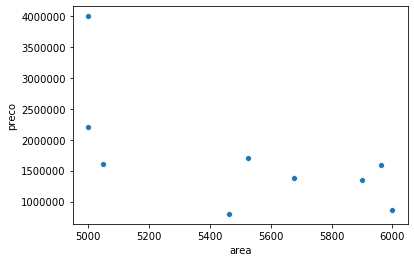

127.0.0.1 - - [29/Feb/2020 18:11:07] "GET /area/5000/6000 HTTP/1.1" 200 -


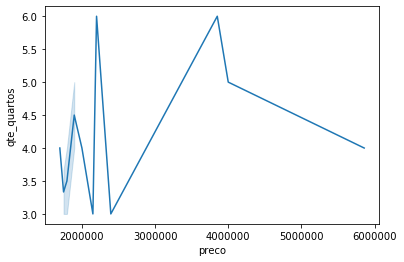

127.0.0.1 - - [29/Feb/2020 18:11:11] "GET /top15 HTTP/1.1" 200 -


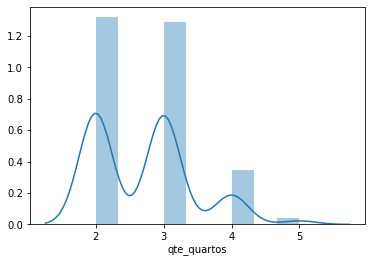

127.0.0.1 - - [29/Feb/2020 18:11:16] "GET /banheiros/2 HTTP/1.1" 200 -


In [1]:
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from flask import Flask, request
%matplotlib inline
con = psycopg2.connect(host = 'localhost', database = 'imobiliaria', user = 'postgres', password = 'postgres')
cur = con.cursor()

#Criar endpoint de get, que deve selecionar os dados dentro de um intervalo de area, plotar o gráfico de 
#dispersão em que o eixo x é a área e o eixo y o preco e retornar o json com esses dados; 

app = Flask(__name__)

@app.route("/area/<min>/<max>", methods = ['GET'])
def area(min, max):
    
    try:
        query = "SELECT * FROM info_casas WHERE area BETWEEN {} AND {};".format(min, max)
        df = pd.read_sql(query, con)
        sns.scatterplot(x=df['area'], y=df['preco'])
        plt.show()
        return df.to_json(orient = 'records'), 200
    
    except:
        return 'Não foi possível fazer o SELECT em info_casas', 500

#Criar endpoint de get, que deve selecionar os 15 dados com maior preco em ordem decrescente, plotar o 
#gráfico de linha em que o eixo x é o preco e o eixo y a qte_quartos e retornar o json com esses dados; 

@app.route("/top15", methods = ['GET'])
def top15():
    
    try:
        query = "SELECT * FROM info_casas ORDER BY preco DESC LIMIT 15"
        df = pd.read_sql(query, con)
        sns.lineplot(df['preco'], df['qte_quartos'])
        plt.show()
        return df.to_json(orient = 'records'), 200
    
    except:
        return 'Não foi possível fazer o SELECT em info_casas', 500

#Criar endpoint de get, que deve selecionar todos os dados com determinada quantidade de qte_banheiros, 
#plotar o histograma com a quantidade de quartos; 

@app.route("/banheiros/<n>", methods = ['GET'])
def banheiros(n):
    
    try:
        query = "SELECT * FROM info_casas WHERE qte_banheiros = {};".format(n)
        df = pd.read_sql(query, con)
        sns.distplot(df['qte_quartos'])
        plt.show()
        return df.to_json(orient = 'records'), 200
    
    except:
        return 'Não foi possível fazer o SELECT em info_casas', 500
    
#Criar endpoint de put, que atualize os dados pelo cep;

@app.route("/attcep/<cep>", methods = ['PUT'])
def attcep(cep):
    post_args = request.json
    query = "UPDATE info_casas SET qte_quartos = {}, qte_banheiros = {}, area = {}, preco = {} WHERE cep = {}".format(post_args["qte_quartos"], post_args["qte_banheiros"], post_args["area"], post_args["preco"], cep)

    try:
        cur.execute(query)
        con.commit()
        return "sucesso", 200
    except:
        return 'Não foi possível alterar info_casas', 500

#Criar endpoint de delete, que delete os dados pelo cep;
@app.route("/delete/<cep>", methods = ['DELETE'])
def delete(cep):
    
    try:
        query = "DELETE FROM info_casas WHERE cep = {};".format(cep)
        cur.execute(query)
        con.commit()
        return "sucesso", 200
    
    except:
        return 'Não foi possível fazer o DELETE em info_casas', 500

app.run()